# Import Libraries

In [168]:
import random
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import copy
import logging
import missingno
import operator
from collections import Counter
from category_encoders import TargetEncoder, BinaryEncoder
from imblearn.over_sampling import (
    SMOTE,
    RandomOverSampler,
    SVMSMOTE,
    BorderlineSMOTE,
    ADASYN,
    SMOTEN,
    SMOTENC
)
from imblearn.under_sampling import (
    TomekLinks, 
    RandomUnderSampler,
    EditedNearestNeighbours, 
    RepeatedEditedNearestNeighbours, 
    AllKNN, 
    CondensedNearestNeighbour, 
    ClusterCentroids, 
    NearMiss
)
from sklearn.model_selection import (
    LeaveOneOut,
    LeavePOut,
    RepeatedKFold,
    StratifiedKFold,
    TimeSeriesSplit,
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    learning_curve,
    KFold
)
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import (
    LabelEncoder,
    OrdinalEncoder,
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    LabelBinarizer, 
    MultiLabelBinarizer,
    MaxAbsScaler,
    QuantileTransformer,
    PowerTransformer,
    Normalizer
)
from sklearn.feature_extraction import (
    DictVectorizer, 
    FeatureHasher
)
from sklearn.linear_model import (
    LogisticRegression,
    Ridge,
    Lasso,
    ElasticNet,
    BayesianRidge
)
from sklearn.feature_selection import (
    SelectKBest, 
    SelectFpr, 
    SelectFdr, 
    SelectFwe, 
    SelectPercentile, 
    GenericUnivariateSelect, 
    VarianceThreshold, 
    RFE, 
    RFECV, 
    SequentialFeatureSelector, 
    SelectFromModel, 
    f_regression, 
    chi2, 
    f_classif, 
    mutual_info_classif, 
    mutual_info_regression
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import (
    KNeighborsClassifier,
    NearestNeighbors
)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier
)
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    matthews_corrcoef,
    balanced_accuracy_score
)
from tpot import TPOTClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.decomposition import (
    PCA, 
    FactorAnalysis, 
    TruncatedSVD, 
    FastICA, 
    KernelPCA
)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from tensorflow.keras.layers import Input, Dense  # type: ignore
from tensorflow.keras.models import Model  # type: ignore
from scipy.stats import uniform, randint
from fast_ml.model_development import train_valid_test_split
from typing import (
    Any,
    Literal,
    Union,
    List,
    Optional,
    Dict,
    Tuple
)
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
logging.basicConfig(level=logging.INFO)

# Call_def

In [169]:
from ML_def import (
    read_data,
    columns_info,
    not_useful_columns,
    convert_to_numeric,
    target_last_col,
    remove_missing_rows,
    fill_missing_values_dataFrame,
    fill_missing_values_column,
    check_outliers,
    box_plot_all_columns,
    get_columns_with_2_unique_values,
    analyze_null_columns,
    check_balance_classification,
    rate_by_group,
    over_under_sampling_classification,
    plot_groupby,
    plot_pivot,
    plot_pivot_2,
    plot_groupby_and_pivot,
    calculate_correlation,
    Heatmap_Correlation,
    create_custom_scatter_plot,
    plot_histograms,
    encode_column,
    get_x_y_TVT,
    validate_test_data_categorical_columns,
    get_x_y_TVT_shape,
    feature_selection,
    dimensionality_reduction,
    scale_data,
    get_cross_validator,
    grid_search_classifier,
    random_search_classifier,
    get_classifier,
    get_x_y,
    plot_feature_importance,
    Check_Overfitting_Classification,
    plot_confusion_matrix,
    evaluate_model_Classification,
    plots_evaluate_models,
)

# call_visualization_def

In [170]:
from ML_visualization import (
    plot_line,
    plot_line_matplotlib,
    plot_line_all_column,
    plot_line_seaborn,
    plot_line_plotly,
    scatter_plot_matplotlib,
    scatter_plot_seaborn,
    scatter_plot_plotly,
    reg_plot,
    resid_plot,
    bar_plot_matplotlib,
    bar_plot_seaborn,
    bar_plot_all_column,
    bar_plot_plotly,
    multiple_bar_plot_matplotlib,
    multiple_bar_plots_seaborn,
    multiple_bar_plots_plotly,
    cat_plot,
    cat_plot_all_column,
    facet_grid_seaborn,
    pie_chart,
    pie_chart_plotly,
    plot_single_histogram_matplotlib,
    plot_histograms_matplotlib,
    plot_single_histogram_seaborn,
    plot_histograms_seaborn,
    plot_histograms_plotly,
    kde_plot,
    kde_plot_all_column,
    count_plot,
    count_plot_all_column,
    count_plot_plotly,
    box_plot_matplotlib,
    box_plot_seaborn,
    box_plot_plotly,
    box_plot_all_column,
    heatmap_plot,
    heatmap_plot_plotly,
    pair_plot,
    pair_plot_plotly,
    violin_plot,
    violin_plot_plotly,
    plot_violin_all_column,
    joint_plot,
    plot_parallel_coordinates,
    plot_contour,
    plot_tricontourf,
    custom_plot
)

# Read_Data

In [171]:
df = read_data(r'Telco_customer_churn.xlsx', sheet_name='Telco_Churn')
true_original_df = copy.deepcopy(df)
print(df.shape)
df.head()

the DataFrame dont have any duplicates row
Data read successfully from Telco_customer_churn.xlsx
(7043, 33)


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [172]:
target_column = 'Churn Value'

In [173]:
# Make the target is last column
df = target_last_col(df,target_column)

# Get Information of Data

In [174]:
df_columns = df.columns.to_list()
print(df_columns)

['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Score', 'CLTV', 'Churn Reason', 'Churn Value']


In [175]:
columns_info(df)

,names,dtypes,unique,n_unique,number_of_rows,number_of_null
0,CustomerID,object,"[3668-QPYBK, 9237-HQITU, 9305-CDSKC, 7892-POOK...",7043,7043,0
1,Count,int64,[1],1,7043,0
2,Country,object,[United States],1,7043,0
3,State,object,[California],1,7043,0
4,City,object,"[Los Angeles, Beverly Hills, Huntington Park, ...",1129,7043,0
5,Zip Code,int64,"[90003, 90005, 90006, 90010, 90015, 90020, 900...",1652,7043,0
6,Lat Long,object,"[33.964131, -118.272783, 34.059281, -118.30742...",1652,7043,0
7,Latitude,float64,"[33.964131, 34.059281, 34.048013, 34.062125, 3...",1652,7043,0
8,Longitude,float64,"[-118.272783, -118.30742, -118.293953, -118.31...",1651,7043,0
9,Gender,object,"[Male, Female]",2,7043,0


# drop not useful columns

#### list of columns

In [176]:
not_useful_columns_name = ['CustomerID', 'Count', 'Country', 'State', 'Churn Label', 'Churn Reason']
not_useful_columns(df=df, column_name=not_useful_columns_name)

#### single column

In [177]:
not_useful_columns(df=df, column_name="Lat Long")

# change the dtype of the column from object to numeric

#### list of columns

In [178]:
convert_to_numeric_columns_name = ['Total Charges']
convert_to_numeric(df=df, column_name=convert_to_numeric_columns_name)

#### single column

In [179]:
# convert_to_numeric(df=df, column_name='Total Charges')

# take copy for Visualization

In [180]:
original_df = copy.deepcopy(df)
original_df.head(3)

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Score,CLTV,Churn Value
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,86,3239,1
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,67,2701,1
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,86,5372,1


# Describe numerical column and his information

In [181]:
Describe_numerical_column = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(Describe_numerical_column)

['Zip Code', 'Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV', 'Churn Value']


In [182]:
df.describe()

,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Score,CLTV,Churn Value
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000
mean,93521.964646,36.282441,-119.798880,32.371149,64.761692,2283.300441,58.699418,4400.295755,0.265370
std,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.771362,21.525131,1183.057152,0.441561
min,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000,5.000000,2003.000000,0.000000
25%,92102.000000,34.030915,-121.815412,9.000000,35.500000,401.450000,40.000000,3469.000000,0.000000
50%,93552.000000,36.391777,-119.730885,29.000000,70.350000,1397.475000,61.000000,4527.000000,0.000000
75%,95351.000000,38.224869,-118.043237,55.000000,89.850000,3794.737500,75.000000,5380.500000,1.000000
max,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,100.000000,6500.000000,1.000000


# Describe object column and his information

In [183]:
Describe_object_column =df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
print(Describe_object_column)

['City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']


In [184]:
df.describe(include=['object'])

,City,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,1129,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Los Angeles,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,305,3555,5901,3641,5416,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


# Data Encoding columns with 2 unique values

In [185]:
get_columns_with_2_unique_values(df)

The list: ['Gender'] unique values: ('Female', 'Male')
The list: ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing'] unique values: ('No', 'Yes')


In [186]:
columns = ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing']
df = encode_column(df, columns = columns, method='binary', binary_1='Yes', binary_0='No')

In [187]:
columns = ['Gender']
df = encode_column(df, columns = columns, method='binary', binary_1='Known', binary_0='Unknown')

In [188]:
# if the target column not binary
# columns = [target_column]
# true_original_df = encode_column(true_original_df, columns = columns, method='binary', binary_1='Yes', binary_0='No')

In [189]:
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Score,CLTV,Churn Value
0,Los Angeles,90003,33.964131,-118.272783,1,1,1,1,2,1,...,No,No,Month-to-month,1,Mailed check,53.85,108.15,86,3239,1
1,Los Angeles,90005,34.059281,-118.307420,0,1,1,0,2,1,...,No,No,Month-to-month,1,Electronic check,70.70,151.65,67,2701,1
2,Los Angeles,90006,34.048013,-118.293953,0,1,1,0,8,1,...,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.50,86,5372,1
3,Los Angeles,90010,34.062125,-118.315709,0,1,0,0,28,1,...,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,84,5003,1
4,Los Angeles,90015,34.039224,-118.266293,1,1,1,0,49,1,...,Yes,Yes,Month-to-month,1,Bank transfer (automatic),103.70,5036.30,89,5340,1


# check columns have nulls

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip Code           7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   int64  
 5   Senior Citizen     7043 non-null   int64  
 6   Partner            7043 non-null   int64  
 7   Dependents         7043 non-null   int64  
 8   Tenure Months      7043 non-null   int64  
 9   Phone Service      7043 non-null   int64  
 10  Multiple Lines     7043 non-null   object 
 11  Internet Service   7043 non-null   object 
 12  Online Security    7043 non-null   object 
 13  Online Backup      7043 non-null   object 
 14  Device Protection  7043 non-null   object 
 15  Tech Support       7043 non-null   object 
 16  Streaming TV       7043 

In [191]:
null_columns = analyze_null_columns(df)
null_columns

The columns dtype is object: []
The columns dtype is numerical: ['Total Charges']


,Column,Null Count,Type
0,Total Charges,11,float64


## Identify columns with missing values

In [192]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values: \n" , missing_columns)

Columns with missing values: 
 ['Total Charges']


# Removing Rows with Missing Values

#### list of columns

In [193]:
# remove_rows_column_name = ['Total Charges', '', '']
# remove_missing_rows(df=df, column_name=remove_rows_column_name)

#### single column

In [194]:
# remove_missing_rows(df=df, column_name='Total Charges')

#### from all DataFrame

In [195]:
# remove_missing_rows(df=df)

## check columns with missing values

In [196]:
# # Identify columns with missing values
# missing_columns = df.columns[df.isnull().any()].tolist()
# print("Columns with missing values: \n" , missing_columns)

# Filling Missing Values

### Filling Missing Values for all DataFrame

In [197]:
# df = fill_missing_values_dataFrame(df, model='KNNImputer', n_neighbors=3)

### Filling Missing Values for column

#### list of columns

In [198]:
# fill_missing_columns = ['', '', '']
# df = fill_missing_values_column(df, columns=fill_missing_columns, model='KNNImputer', n_neighbors=3)

#### single column

In [199]:
df = fill_missing_values_column(df, columns='Total Charges', model='KNNImputer', n_neighbors=3)

Columns with missing values: ['Total Charges']
Starting imputation for columns ['Total Charges'] using KNNImputer model
Imputation completed for columns ['Total Charges'] using KNNImputer model


### check columns with missing values

In [200]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values: \n" , missing_columns)

Columns with missing values: 
 []


# check outliers

## check outliers (numbers)

In [201]:
outliers_df = check_outliers(df)

Zip Code             7043
Latitude                0
Longitude            7043
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Paperless Billing       0
Monthly Charges         0
Total Charges        5941
Churn Score             0
CLTV                 7043
Churn Value             0
dtype: int64


## check outliers (plots)

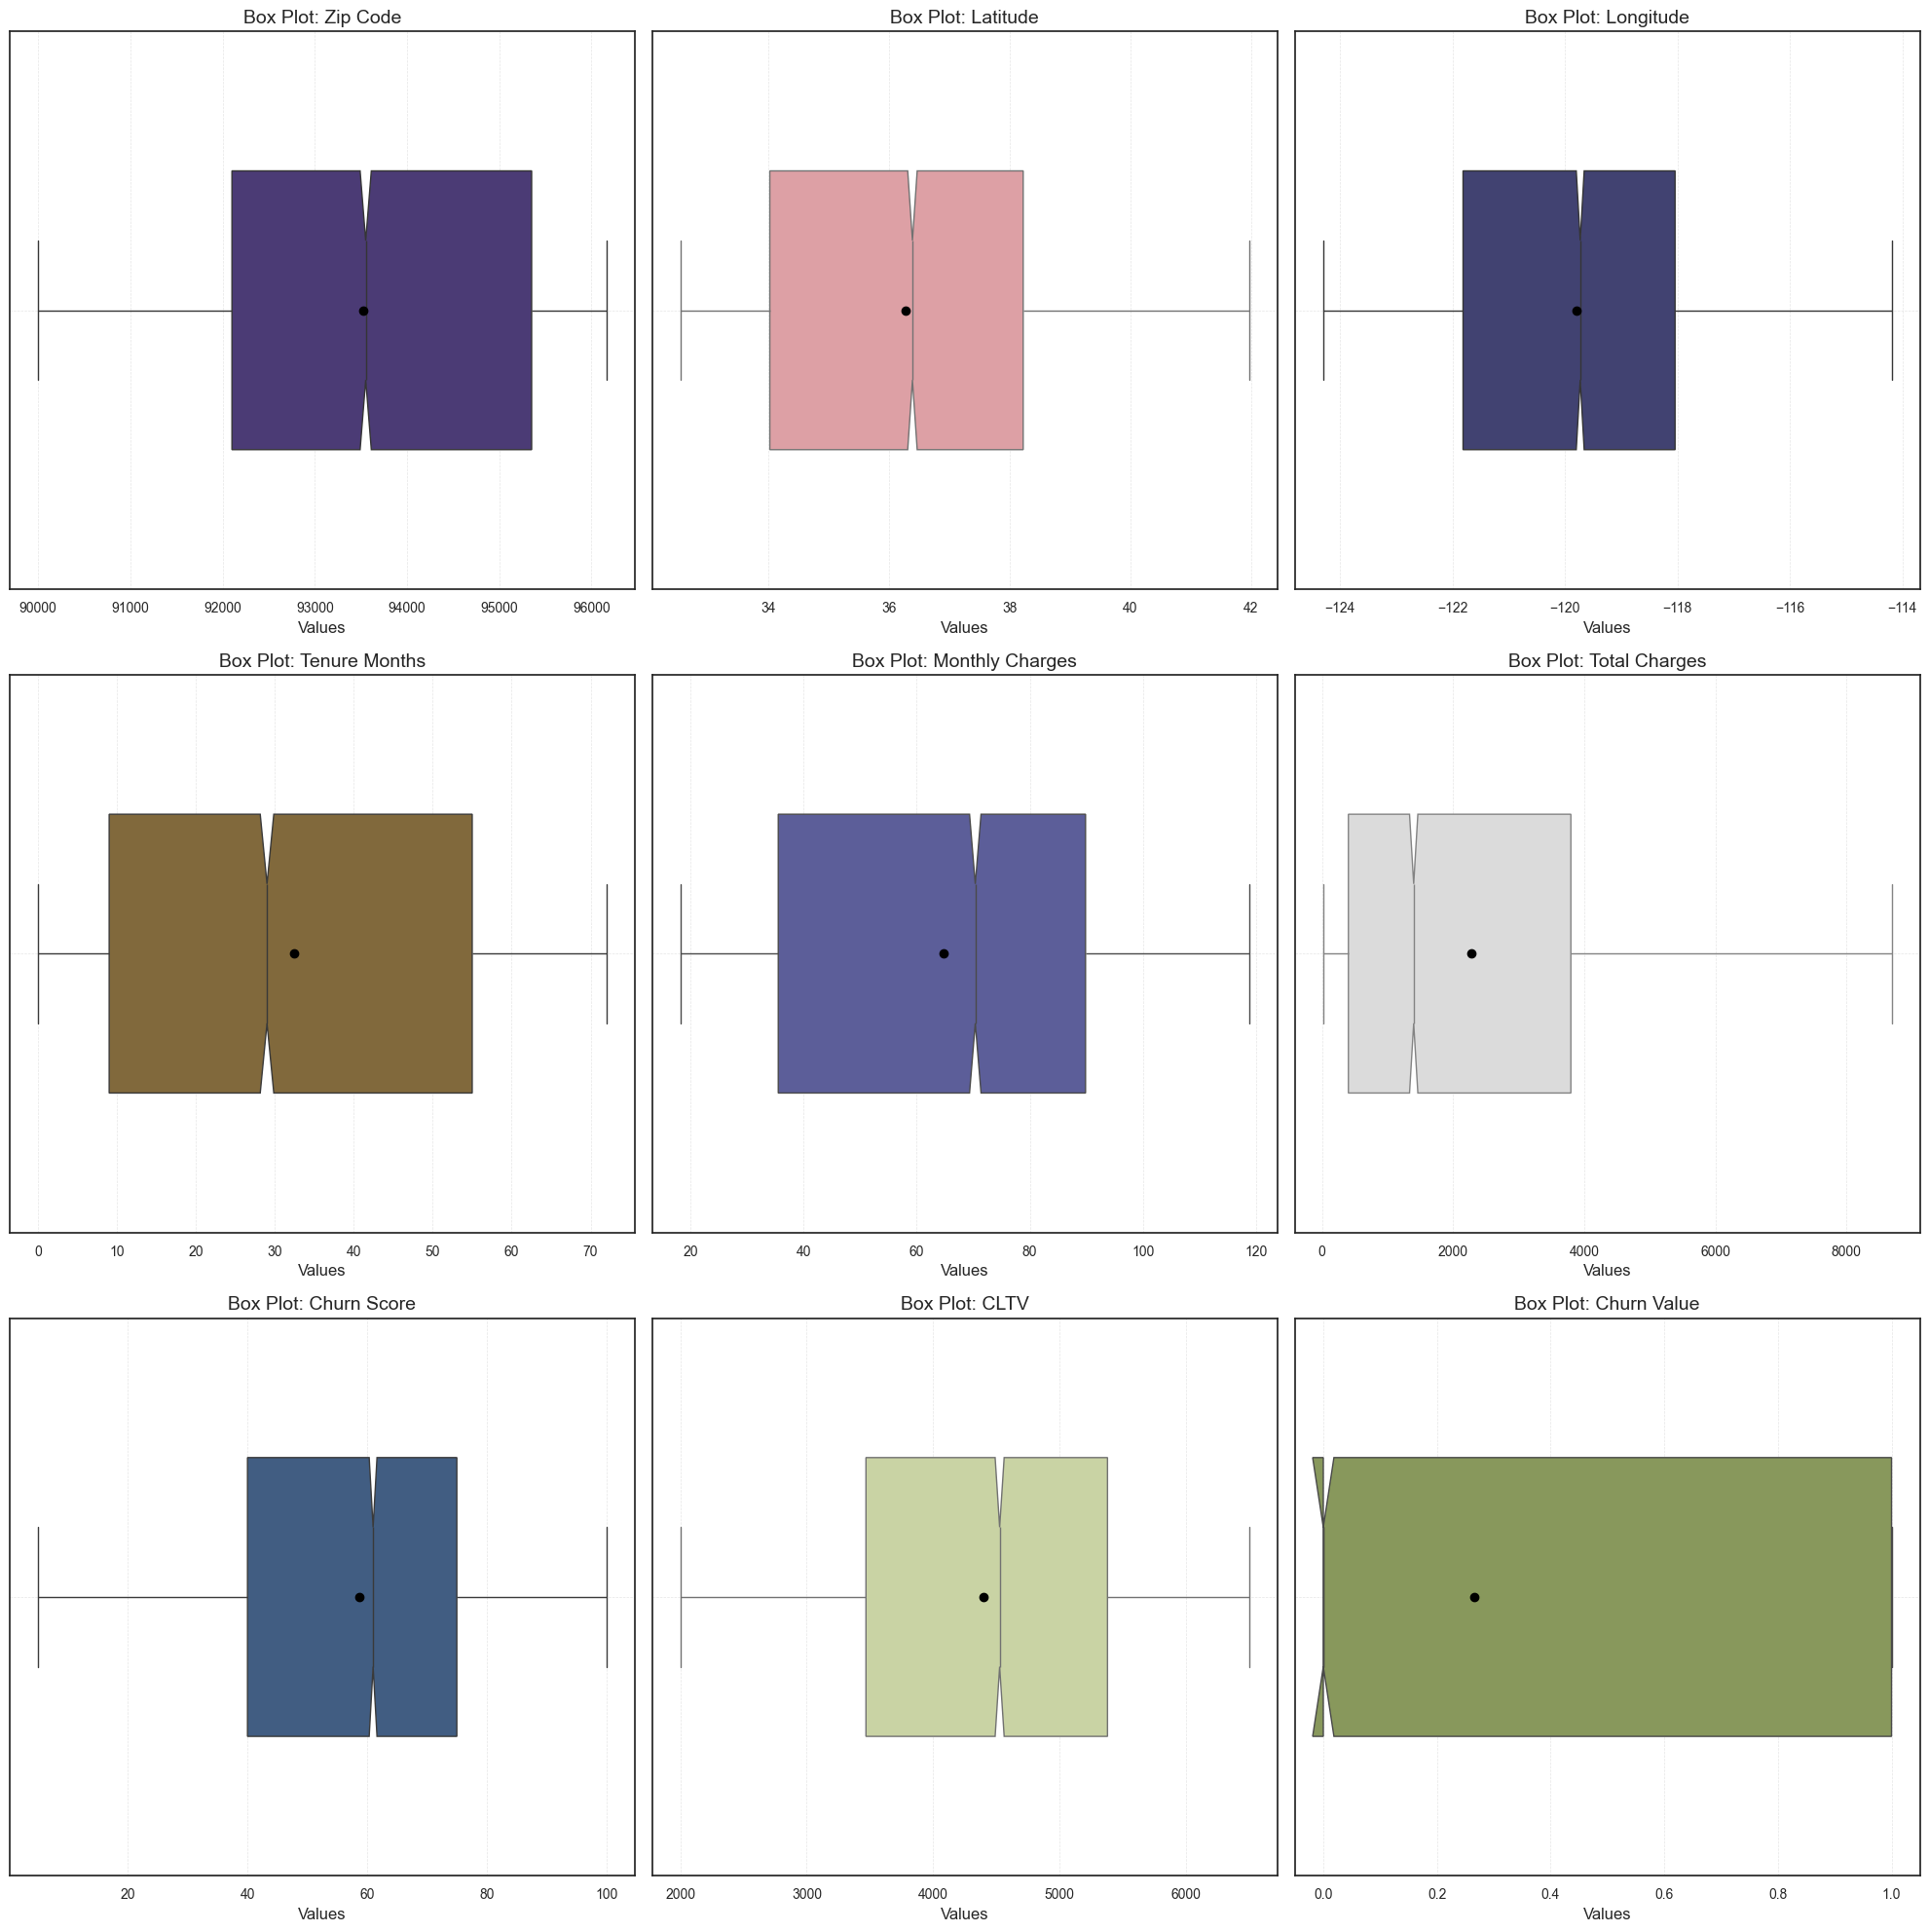

In [202]:
box_plot_all_columns(original_df, subplot_row = 3, figsize=(20, 20))

# Check the unbalance data

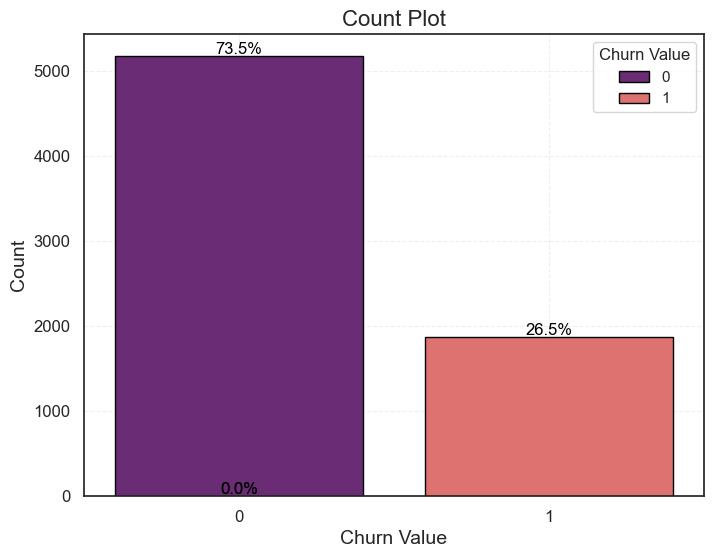

,count
name,
0,5174
1,1869


In [203]:
check_balance_classification(df,column_plot=target_column)

# Visualization

## info from the data

In [204]:
# age_Exited_rates = rate_by_group(true_original_df, 'MaritalStatus', 'Churn', 'CustomerID', positive_class=1, threshold=4)

In [205]:
# NumOfProducts_Exited_rates = rate_by_group(true_original_df, 'PrizmCode', 'Churn', 'CustomerID', positive_class=1)

In [206]:
# Geography_Exited_rates = rate_by_group(true_original_df, 'CreditRating', 'Churn', 'CustomerID', positive_class=1)

In [207]:
# Tenure_Exited_rates = rate_by_group(true_original_df, 'RetentionOffersAccepted', 'Churn', 'CustomerID', positive_class=1, threshold=5)

In [208]:
# Tenure_Exited_rates = rate_by_group(true_original_df, 'RetentionCalls', 'Churn', 'CustomerID', positive_class=1, threshold=5)
# Tenure_Exited_rates

## chart

In [209]:
# PaymentMethod_name = df['PrizmCode'].value_counts().index.to_list()
# PaymentMethod_values = df['PrizmCode'].value_counts().values.tolist()
# # pie_chart(labels=PaymentMethod_name, sizes=PaymentMethod_values, title="Payment Methods")
# pie_chart_plotly(labels=PaymentMethod_name, sizes=PaymentMethod_values, title="Prizm Code")


In [210]:
# InternetService_name = df['MaritalStatus'].value_counts().index.to_list()
# InternetService_values = df['MaritalStatus'].value_counts().values.tolist()
# # pie_chart(labels=InternetService_name, sizes=InternetService_values, title="Payment Methods")
# pie_chart_plotly(labels=InternetService_name, sizes=InternetService_values, title="Marital Status")

In [211]:
# Contract_name = original_df['CreditRating'].value_counts().index.to_list()
# Contract_values = original_df['CreditRating'].value_counts().values.tolist()
# # pie_chart(labels=Contract_name, sizes=Contract_values, title="Payment Methods")
# pie_chart_plotly(labels=Contract_name, sizes=Contract_values, title="Credit Rating")

In [212]:
# Contract_name = original_df['RetentionCalls'].value_counts().index.to_list()
# Contract_values = original_df['RetentionCalls'].value_counts().values.tolist()
# # pie_chart(labels=Contract_name, sizes=Contract_values, title="Payment Methods")
# pie_chart_plotly(labels=Contract_name, sizes=Contract_values, title="Retention Calls")

## Multiple bar

HasCreditCard
RetentionCalls
CreditRating

In [213]:
# grouped_data = original_df.groupby(['HasCreditCard', 'Churn']).size().unstack(fill_value=0)

# categories = grouped_data.index.tolist()
# datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
# labels = ['not Churn', 'Churn']

# multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='HasCreditCard by Churn Status', xlabel='HasCreditCard Type', ylabel='Count')

In [214]:
# grouped_data = original_df.groupby(['RetentionCalls', 'Churn']).size().unstack(fill_value=0)

# categories = grouped_data.index.tolist()
# datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
# labels = ['not Churn', 'Churn']

# multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='RetentionCalls by Churn Status', xlabel='RetentionCalls Type', ylabel='Count')

In [215]:
# grouped_data = original_df.groupby(['CreditRating', 'Churn']).size().unstack(fill_value=0)

# categories = grouped_data.index.tolist()
# datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
# labels = ['not Churn', 'Churn']

# multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='CreditRating by Churn Status', xlabel='CreditRating Type', ylabel='Count')

In [216]:
# grouped_data = original_df.groupby(['CreditRating', 'HasCreditCard']).size().unstack(fill_value=0)

# categories = grouped_data.index.tolist()
# datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
# labels = ["Hasn't Credit Card","Has Credit Card"]

# multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='CreditRating by HasCreditCard Status', xlabel='CreditRating', ylabel='Count')

In [217]:
# grouped_data = original_df.groupby(['RetentionCalls', 'PrizmCode']).size().unstack(fill_value=0)

# categories = grouped_data.index.tolist()
# datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
# labels = ['Other', 'Rural','Suburban', 'Town']

# multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='NumOfProducts by PrizmCode Status', xlabel='NumOfProducts', ylabel='Count')

## Bar

In [218]:
# column_counts = original_df['ThreewayCalls'].value_counts().reset_index()
# column_counts.columns = ['ThreewayCalls', 'value']

# bar_plot_plotly(df=column_counts, x='ThreewayCalls', y='value', hue='value')

In [219]:
# column_counts = original_df['HasCreditCard'].value_counts().reset_index()
# column_counts.columns = ['HasCreditCard', 'value']

# bar_plot_seaborn(df=column_counts, x='HasCreditCard', y='value',palette='viridis')

In [220]:
# column_counts = original_df['RetentionCalls'].value_counts().reset_index()
# column_counts.columns = ['RetentionCalls', 'value']

# bar_plot_matplotlib(column_counts['RetentionCalls'], column_counts['value'],x_rotation=0)

## count plot

In [221]:
# count_plot(df=original_df , x='RetentionOffersAccepted' , hue='Churn')

In [222]:
# categorical_features=original_df.drop(['ServiceArea'],axis=1).select_dtypes(exclude=['int64', 'float64']).columns.tolist()
# count_plot_all_column(categorical_features, original_df, vision='x', num_of_column=4)

## Violin

In [223]:
# violin_plot(data=original_df, x='TruckOwner', y='MonthlyRevenue', hue='TruckOwner',split=True) #catagorical column in x and numircal in y

In [224]:
# violin_plot(data=original_df, x='HasCreditCard', y='PercChangeRevenues', hue='HasCreditCard') #catagorical column in x and numircal in y

In [225]:
# plot_violin_all_column(df, figsize=(30, 30), n_cols=6)

## Histogram

In [226]:
# plot_single_histogram_seaborn(original_df,x='MonthsInService', bins=50, palette='magma', show=False)
# plt.axvline(np.mean(original_df["MonthsInService"]) , color = "black" , label ="The Mean of the tenure")
# plt.axvline(np.median(original_df["MonthsInService"]) , color = "blue" , label ="The Median of the tenure")
# plt.show()

In [227]:
# plot_histograms(original_df,column=None, bins=30, single_histogram_figsize = (20, 20), all_histograms_figsize = (30, 30))

#  Groupby and pivot

### Groupby

In [228]:
# grouped_df = df.groupby('')

### pivot

In [229]:
# pivot_df = df.pivot_table(values='values', index='category', columns='sub_category', aggfunc='mean')

# Correlation Coefficient

## Calculate Correlation

In [230]:
calculate_correlation(df, outcome_column=target_column,num_results=7)

Calculating Pearson correlation coefficients for numeric columns against the outcome column: {outcome_column}
Top 7 results:
             Variable  Pearson Coefficient        P-Value
12        Churn Score             0.664897   0.000000e+00
7       Tenure Months            -0.352229  7.999058e-205
6          Dependents             0.248542   1.234365e-99
11      Total Charges            -0.199428   4.233836e-64
10    Monthly Charges             0.193356   2.706646e-60
9   Paperless Billing             0.191825   2.356554e-59
4      Senior Citizen            -0.150889   3.839860e-37

Churn Score
The Pearson Correlation Coefficient for Churn Score is 0.6649 with a P-value of P = 0

Tenure Months
The Pearson Correlation Coefficient for Tenure Months is -0.3522 with a P-value of P = 7.999e-205

Dependents
The Pearson Correlation Coefficient for Dependents is 0.2485 with a P-value of P = 1.234e-99

Total Charges
The Pearson Correlation Coefficient for Total Charges is -0.1994 with a P-value

,Variable,Pearson Coefficient,P-Value
12,Churn Score,0.664897,0.000000e+00
7,Tenure Months,-0.352229,7.999058e-205
6,Dependents,0.248542,1.234365e-99
11,Total Charges,-0.199428,4.233836e-64
10,Monthly Charges,0.193356,2.706646e-60
9,Paperless Billing,0.191825,2.356554e-59
4,Senior Citizen,-0.150889,3.839860e-37


## Visualize Correlation with Bars

In [231]:
# df_corr = df.corr()[target_column].sort_values(ascending = False)
# df_corr_index = df_corr.index.to_list()
# df_corr_values = df_corr.values.tolist()
# df_corr = pd.DataFrame({'name': df_corr_index, 'values':df_corr_values})
# bar_plot_plotly(df=df_corr, x='name', y='values',hue='values', width=1500, height=650)

## Visualize Correlation with Heatmap

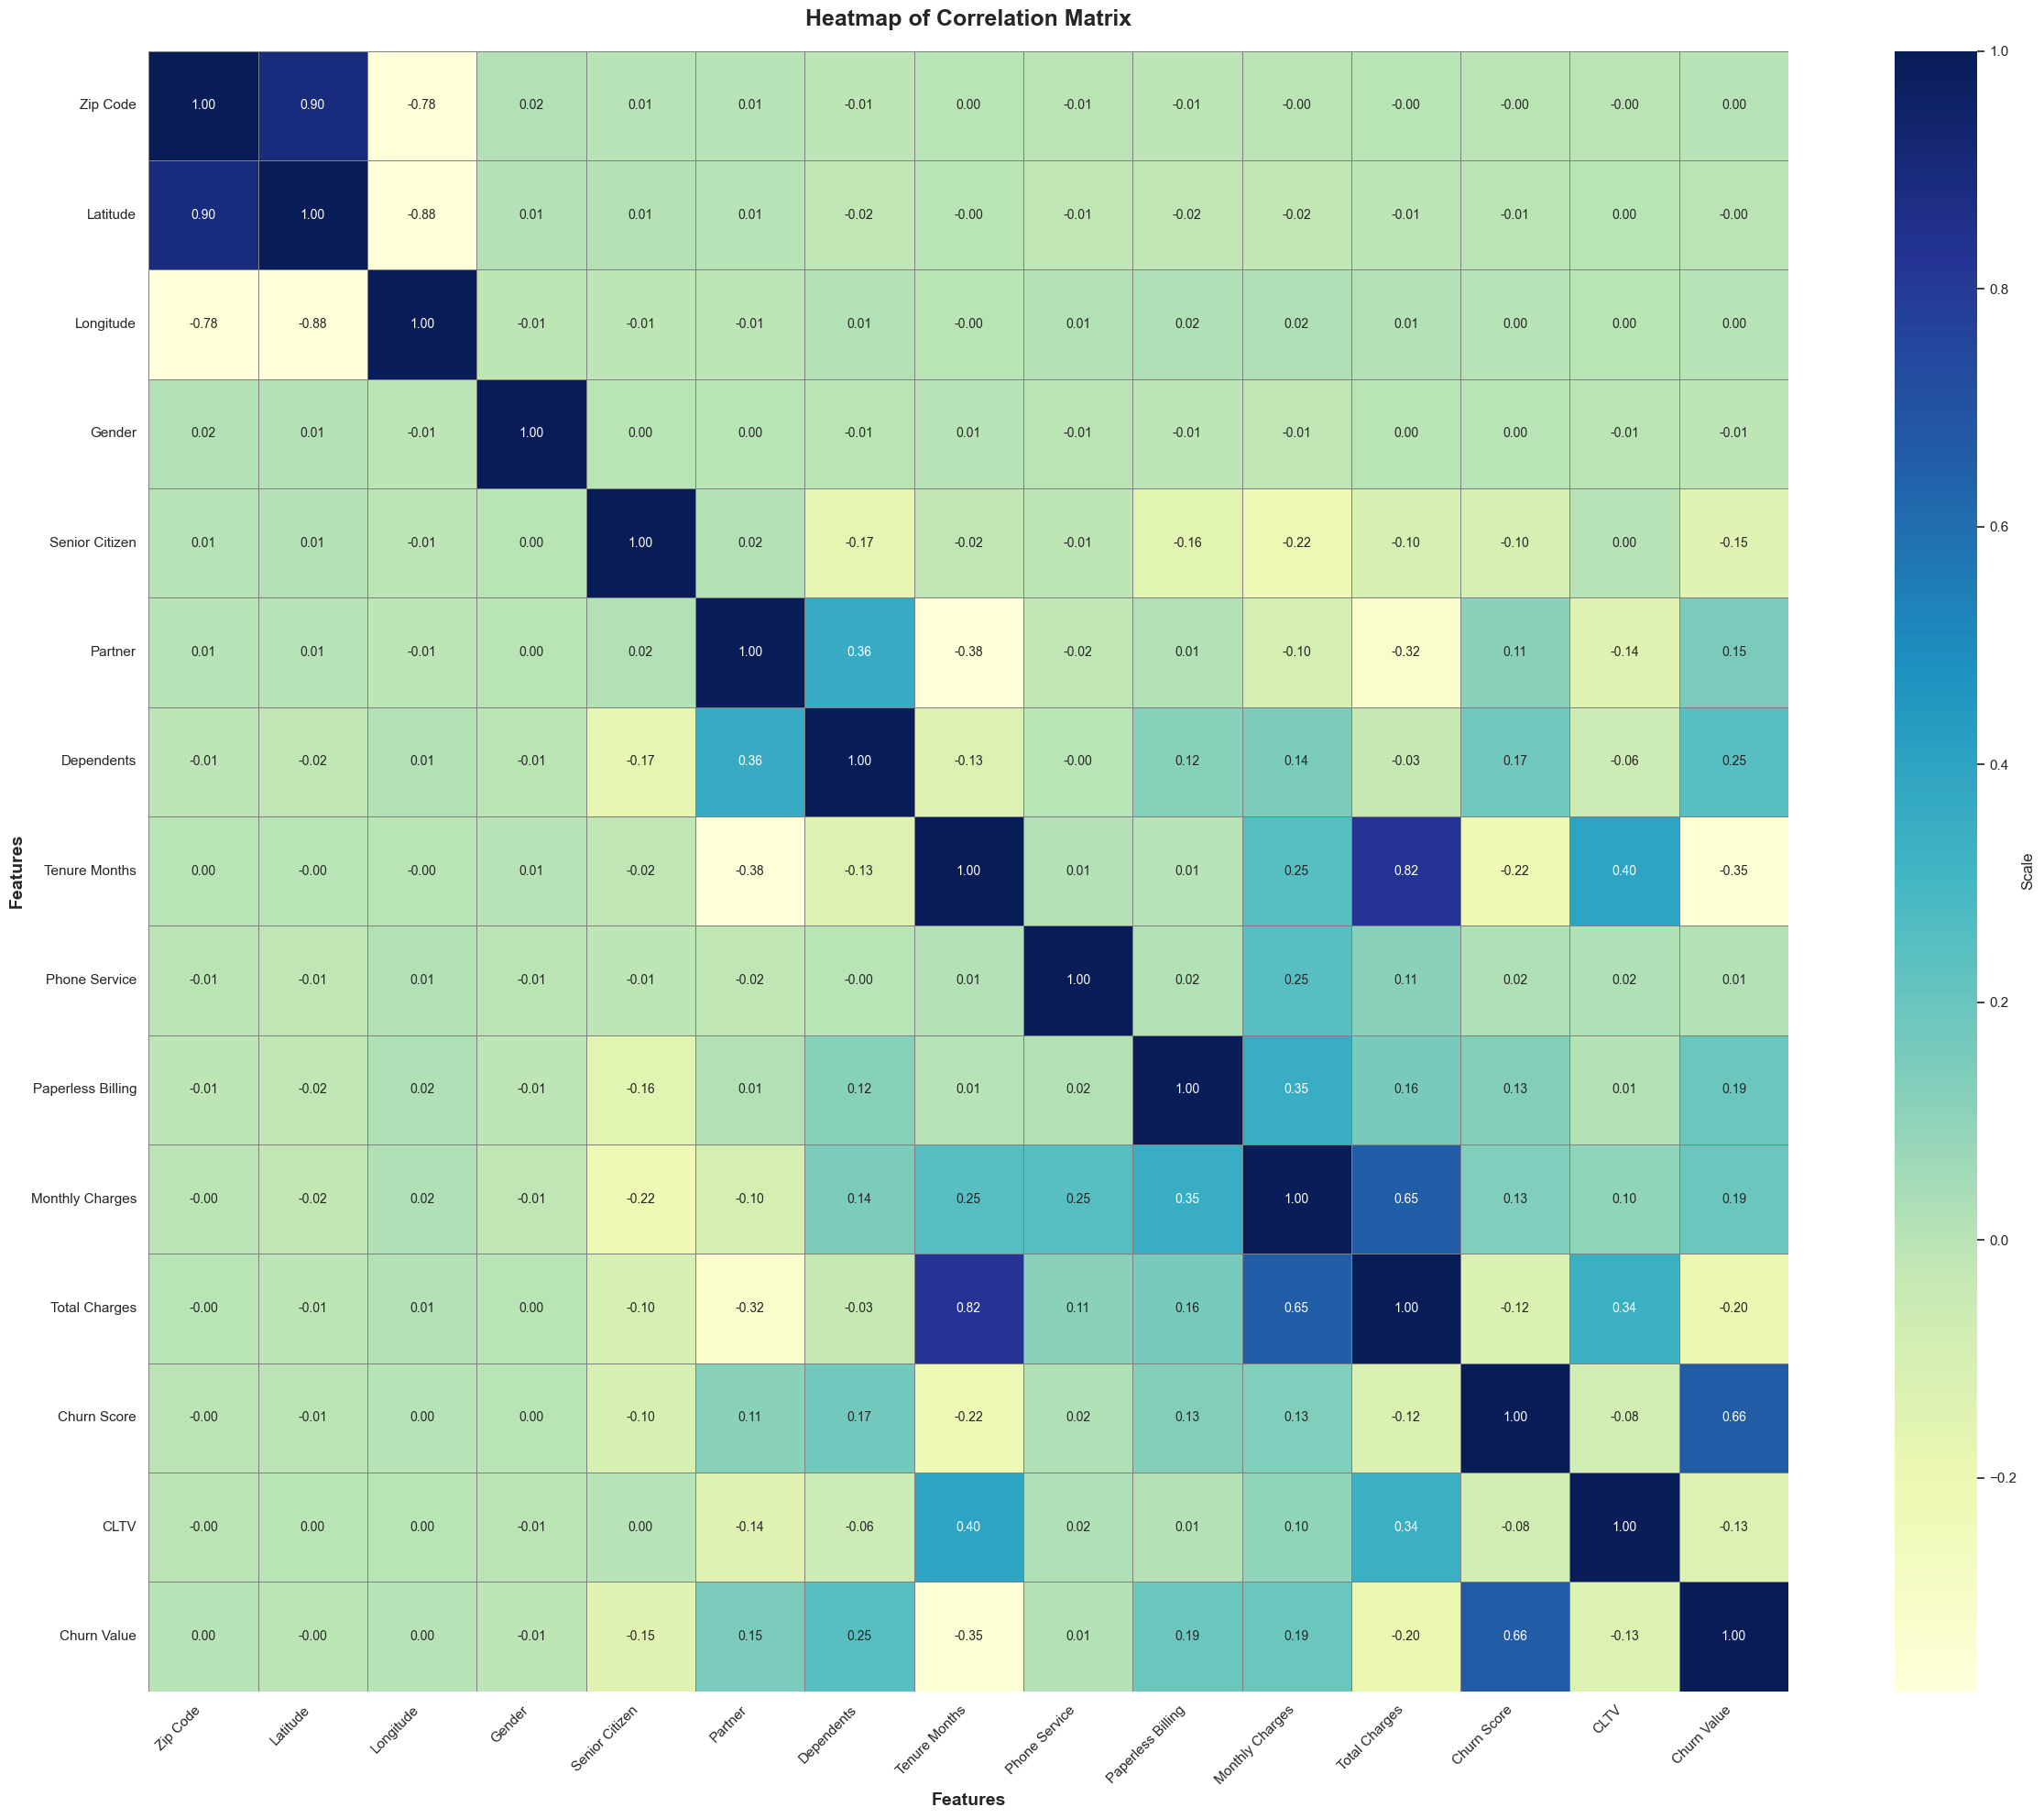

In [232]:
correlations = Heatmap_Correlation(df, mask=-1, cmap="YlGnBu", save_path=None, annot_size = 10, figsize=(25, 20))

# Data Encoding

In [233]:
df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

['City',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Payment Method']

In [234]:
# ordinal_categories = df[''].value_counts().index.to_list()
# ordinal_categories

In [235]:
columns = ['Multiple Lines',
        'Internet Service',
        'Online Security',
        'Online Backup',
        'Device Protection',
        'Tech Support',
        'Streaming TV',
        'Streaming Movies',
        'Contract',
        'Payment Method']

df = encode_column(df, columns = columns, method='get_dummies')

df = encode_column(df, columns = 'City', method= 'label')
df['City'] = df['City'].astype(float)

# ordinal_categories = df['CreditRating'].value_counts().index.to_list()
# df = encode_column(df, columns = 'CreditRating', method= 'ordinal', ordinal_categories=['1-Highest', '2-High', '3-Good', '4-Medium', '5-Low', '6-VeryLow', '7-Lowest'])

# df = encode_column(df, columns = '', method='target',target="")

# df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

In [236]:
len(df.columns)

37

## Make the target is last column

In [237]:
df = target_last_col(df, target_column)
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Churn Value
0,562.0,90003,33.964131,-118.272783,1,1,1,1,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,562.0,90005,34.059281,-118.307420,0,1,1,0,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,562.0,90006,34.048013,-118.293953,0,1,1,0,8,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
3,562.0,90010,34.062125,-118.315709,0,1,0,0,28,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
4,562.0,90015,34.039224,-118.266293,1,1,1,0,49,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


# Repair unbalanced data by using oversampling and undersampling.

In [238]:
x, y = get_x_y(df, target_column)

In [239]:
Counter(df[target_column])

Counter({0: 5174, 1: 1869})

In [240]:
df, x, y = over_under_sampling_classification(x, y, over_sampling_strategy=0.75, n_jobs=-1)

Starting over-sampling and/or under-sampling process.
Initial class distribution: Counter({0: 5174, 1: 1869})

use SVMSMOTE model for oversampling
Applying SVMSMOTE with strategy 0.75
after oversampling class distribution: Counter({0: 5174, 1: 3880})

use TomekLinks model for undersampling
Applying TomekLinks under-sampling.
after undersampling class distribution: Counter({0: 4742, 1: 3880})

Final class distribution: Counter({0: 4742, 1: 3880})
Over-sampling and/or under-sampling process completed.


### Check the unbalance data after repair 

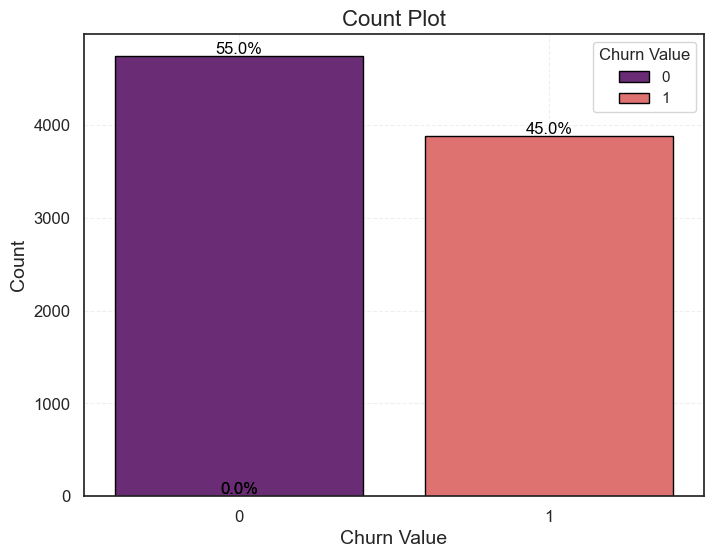

,count
name,
0,4742
1,3880


In [241]:
check_balance_classification(df,column_plot=target_column)

# Get X , Y (TVT)

In [242]:
x_train, y_train, x_valid, y_valid, x_test, y_test = get_x_y_TVT(df, target=target_column)

In [243]:
get_x_y_TVT_shape(x_train, y_train, x_valid, y_valid, x_test, y_test)

x_train shape = (6069, 36)
x_valid shape = (828, 36)
x_test shape = (1725, 36)
y_train shape = (6069,)
y_valid shape = (828,)
y_test shape = (1725,)


# Get train, valid and test data in same time

In [244]:
# df.columns.tolist()
# x_train , y_train ,x_valid , y_valid , x_test , y_test = train_valid_test_split(df , target='Churn Value',train_size=0.7,valid_size=0.1,test_size=0.2,random_state=42)
# get_x_y_TVT_shape(x_train, y_train, x_valid, y_valid , x_test, y_test)

# Scaling

In [245]:
x_train, x_valid, x_test = scale_data(x_train, x_valid, x_test)

# Feature Selection

In [246]:
print(len(df.columns))

37


In [247]:
x_train, x_test, x_valid, FS_model = feature_selection(x_train=x_train, y_train=y_train, x_test=x_test, x_valid=x_valid, method='SelectKBest', stat_method='f_classif', k=20)
selected_mask_FS = FS_model.get_support()

x_column_name = x
x = FS_model.transform(x)

# Get selected and dropped columns
selected_columns = x_column_name.columns[selected_mask_FS]
dropped_columns = x_column_name.columns[~selected_mask_FS]

# Dimensionality Reduction

In [248]:
# print(len(df.columns))
# print(x_train.shape[1])

In [80]:
# x_train, x_test, x_valid, DR_model = dimensionality_reduction(x_train=x_train, x_test=x_test, x_valid=x_valid, y_train=y_train, method= 'FactorAnalysis', n_components=30)
# x = DR_model.transform(x)

# Train

In [81]:
models_names = ['XGBoost', 'RandomForest', 'SVM', 'Stacking']
models_values = [None, None, None, None]
have_overfitting = [None, None, None, None]

## XGBoost_model

In [82]:
type_cross_valid = get_cross_validator(cv_type='StratifiedKFold', cv=5)

In [83]:
best_params, best_score, best_estimator = grid_search_classifier('XGBoost', x_train, y_train, cv=type_cross_valid, scoring='accuracy')

print('best_params =',best_params)
print('best_params =',best_score)

best_params = {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300}
best_params = 0.7571931502988075


In [83]:
XGBoost_model = best_estimator
XGBoost_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

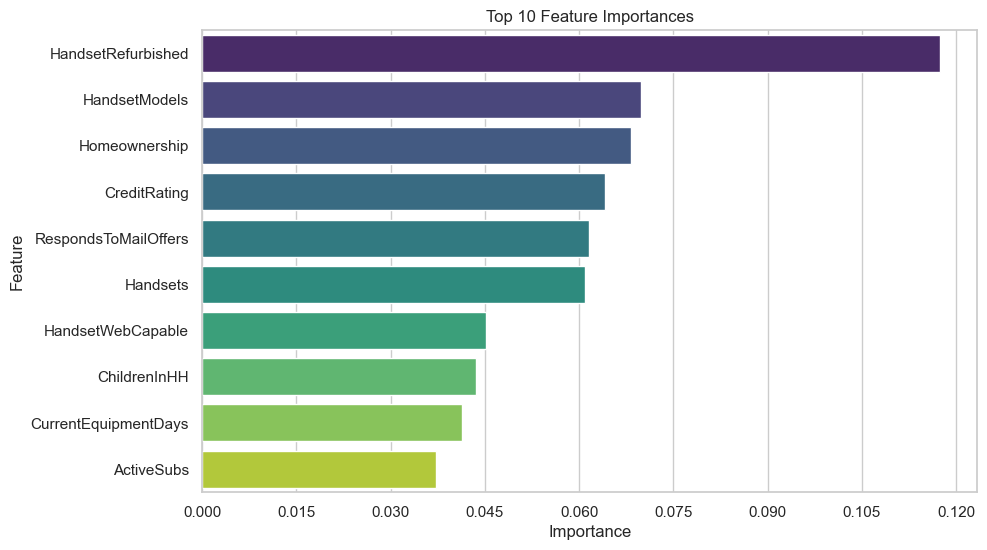

In [84]:
plot_feature_importance(XGBoost_model, x_train, selected_columns, top_n='first')

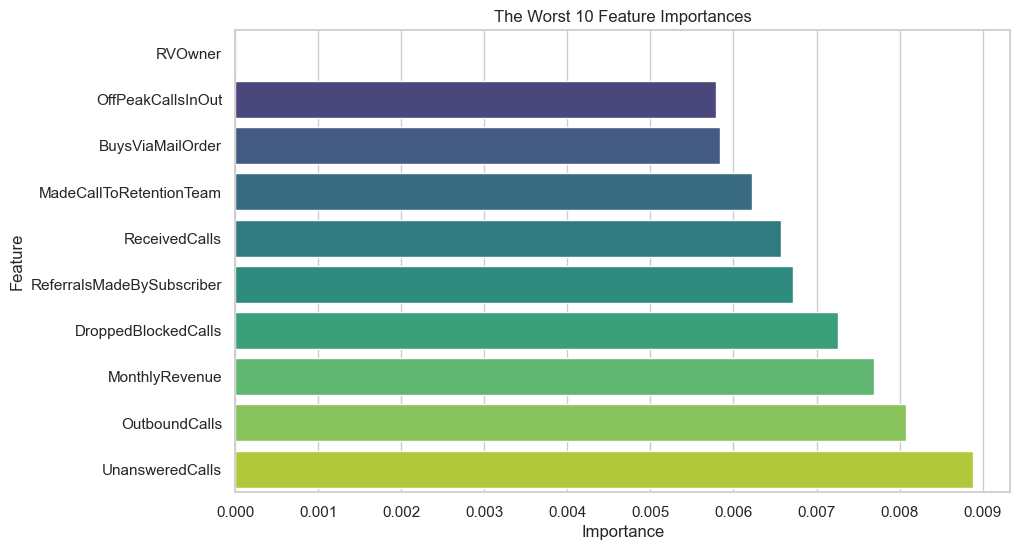

In [85]:
plot_feature_importance(XGBoost_model, x_train, selected_columns, top_n='last')

## Random Search

In [ ]:
# ensemble_estimators = [('rf', RandomForestClassifier()), ('svc', SVC())]
# best_params, best_score, best_estimator = random_search_classifier('RandomForestClassifier', x_train, y_train, cv=type_cross_valid)

# print('best_params =',best_params)
# print('best_params =',best_score)

In [ ]:
# model = best_estimator
# model

## Train Without Search Classification

In [ ]:
# model = get_classifier('xgboost_classifier', x_train, y_train, n_estimators=100, learning_rate=0.1)
# model

#### Examples

In [ ]:
# # Example usage for each model

# # Logistic Regression
# logistic_regression_model = get_classifier(
#     'logistic_regression', x_train, y_train, solver='liblinear', max_iter=100
# )

# # Naive Bayes
# naive_bayes_model = get_classifier(
#     'naive_bayes', x_train, y_train
# )

# # K-Neighbors Classifier
# kneighbors_classifier_model = get_classifier(
#     'kneighbors_classifier', x_train, y_train, n_neighbors=5, algorithm='auto'
# )

# # Support Vector Classifier
# svc_model = get_classifier(
#     'svc', x_train, y_train, kernel='rbf', C=1.0
# )

# # Decision Tree Classifier
# decision_tree_classifier_model = get_classifier(
#     'decision_tree_classifier', x_train, y_train, criterion='gini', max_depth=None
# )

# # Random Forest Classifier
# random_forest_classifier_model = get_classifier(
#     'random_forest_classifier', x_train, y_train, n_estimators=100, max_depth=None
# )

# # Bagging Classifier
# bagging_classifier_model = get_classifier(
#     'bagging_classifier', x_train, y_train, n_estimators=10, base_estimator=None
# )

# # AdaBoost Classifier
# adaboost_classifier_model = get_classifier(
#     'adaboost_classifier', x_train, y_train, n_estimators=50, learning_rate=1.0
# )

# # Gradient Boosting Classifier
# gradient_boosting_classifier_model = get_classifier(
#     'gradient_boosting_classifier', x_train, y_train, n_estimators=100, learning_rate=0.1
# )

# # XGBoost Classifier
# xgboost_classifier_model = get_classifier(
#     'xgboost_classifier', x_train, y_train, n_estimators=100, learning_rate=0.1
# )

# # Stacking Classifier
# stacking_classifier_model = get_classifier(
#     'stacking_classifier', x_train, y_train, estimators=[
#         ('lr', LogisticRegression()),
#         ('rf', RandomForestClassifier(n_estimators=10))
#     ], final_estimator=LogisticRegression()
# )

### Check Overfitting

Accuracy:
Training Accuracy: 0.7737
Validation Accuracy: 0.7493

Precision:
Training Precision: 0.7953
Validation Precision: 0.7667

Recall:
Training Recall: 0.7737
Validation Recall: 0.7493

F1-Score:
Training F1-Score: 0.7618
Validation F1-Score: 0.7353

MCC:
Training MCC: 0.5474
Validation MCC: 0.4900

Balanced Accuracy:
Training Balanced Accuracy: 0.7455
Validation Balanced Accuracy: 0.7183

Confusion Matrix:
Validation Confusion Matrix:
[[3036  257]
 [1176 1247]]

Cross-Validation(CV):
Cross-Validation Scores: [0.75302318 0.75814578 0.75327511 0.75694969 0.75300244]
Cross-Validation Mean Score: 0.7549


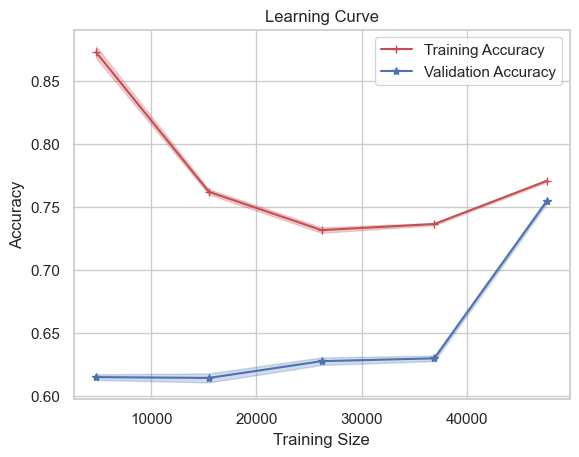

ROC AUC: 0.7979


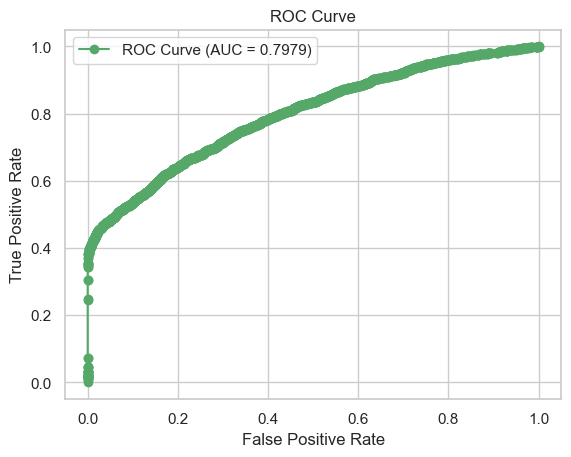

In [86]:
Check_Overfitting_Classification(XGBoost_model,x,y,x_train,y_train,x_valid,y_valid)

In [92]:
have_overfitting[0] = 1 # if have overfitting add -1 if have small overfitting between(1% and 4%) add 0 if no overfitting add 1

### Get y_predict

In [88]:
y_pred = XGBoost_model.predict(x_test)

### Evaluate model

#### Confusion Matrix

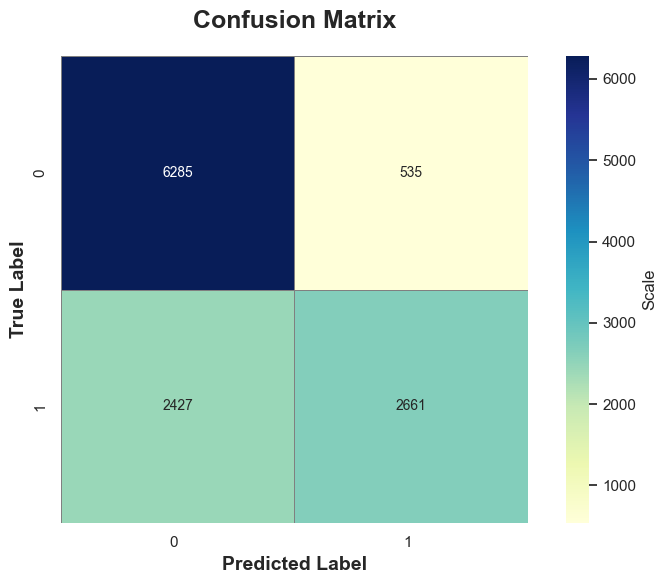

In [89]:
plot_confusion_matrix(y_test, y_pred)

#### accuracy,recall,precision,f1 and roc_auc

Accuracy score = 0.7513
Recall score = 0.5230
Precision score = 0.8326
F1 score = 0.6424
ROC AUC score = 0.7223

Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.92      0.81      6820
           1       0.83      0.52      0.64      5088

    accuracy                           0.75     11908
   macro avg       0.78      0.72      0.73     11908
weighted avg       0.77      0.75      0.74     11908




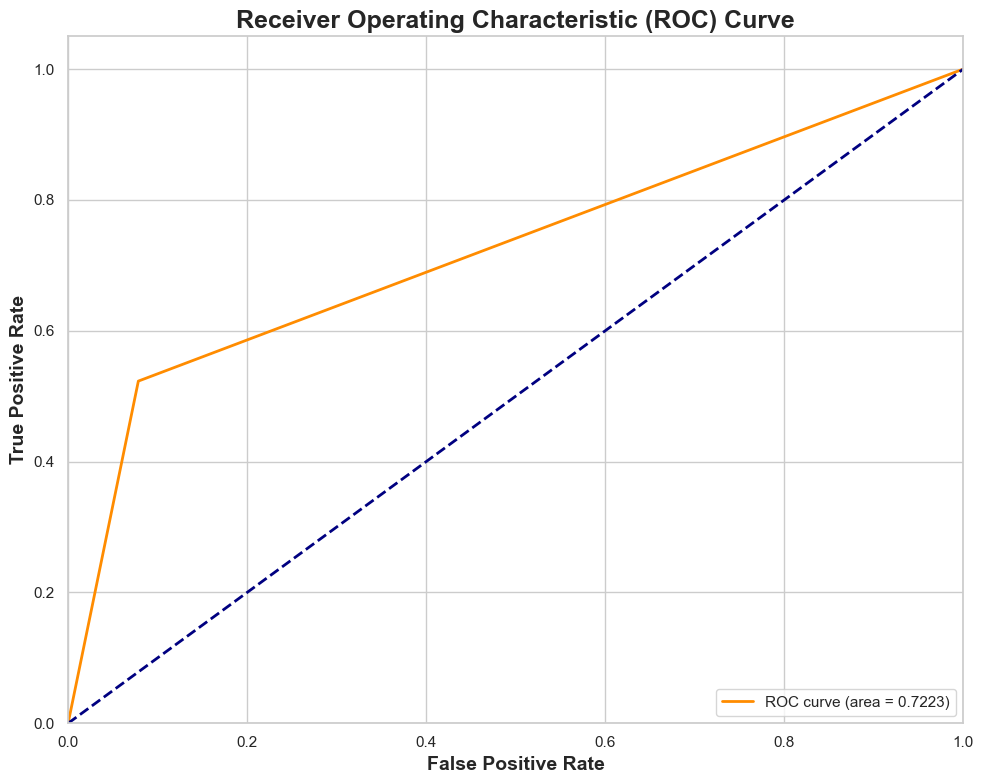

In [90]:
accuracy, recall, precision, f1, roc_auc = evaluate_model_Classification(y_test, y_pred)
models_values[0] = [accuracy, recall, precision, f1, roc_auc]

## RandomForest_model

In [91]:
type_cross_valid = get_cross_validator(cv_type='StratifiedKFold', cv=5)

In [93]:
best_params, best_score, best_estimator = random_search_classifier('RandomForest', x_train, y_train, cv=type_cross_valid, scoring='accuracy', perfect_params=True)

print('best_params =',best_params)
print('best_params =',best_score)

best_params = {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 29, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 196}
best_params = 0.7483894229476074


In [94]:
RandomForest_model = best_estimator
RandomForest_model

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=29,
                       max_features='log2', min_samples_leaf=5,
                       min_samples_split=5, n_estimators=196)

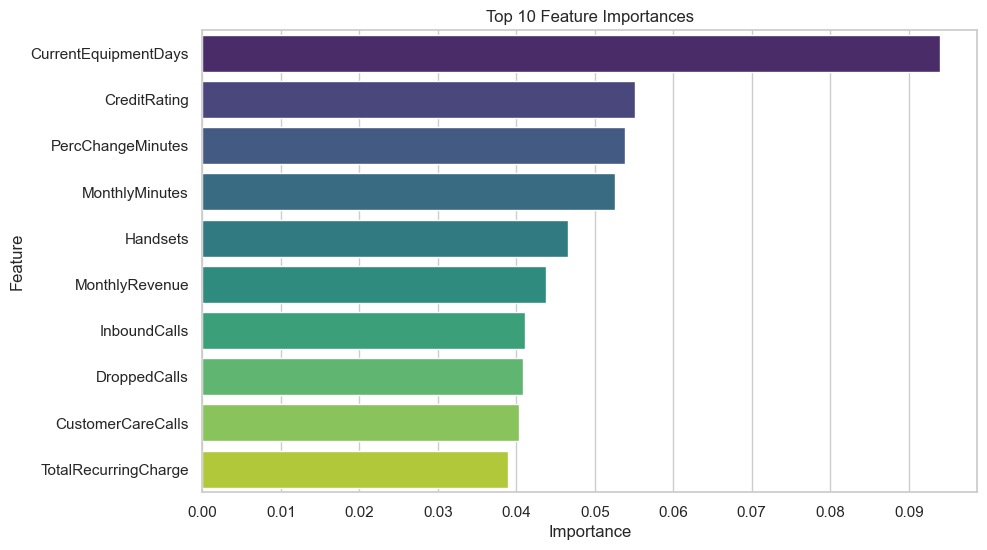

In [95]:
plot_feature_importance(RandomForest_model, x_train, selected_columns, top_n='first')

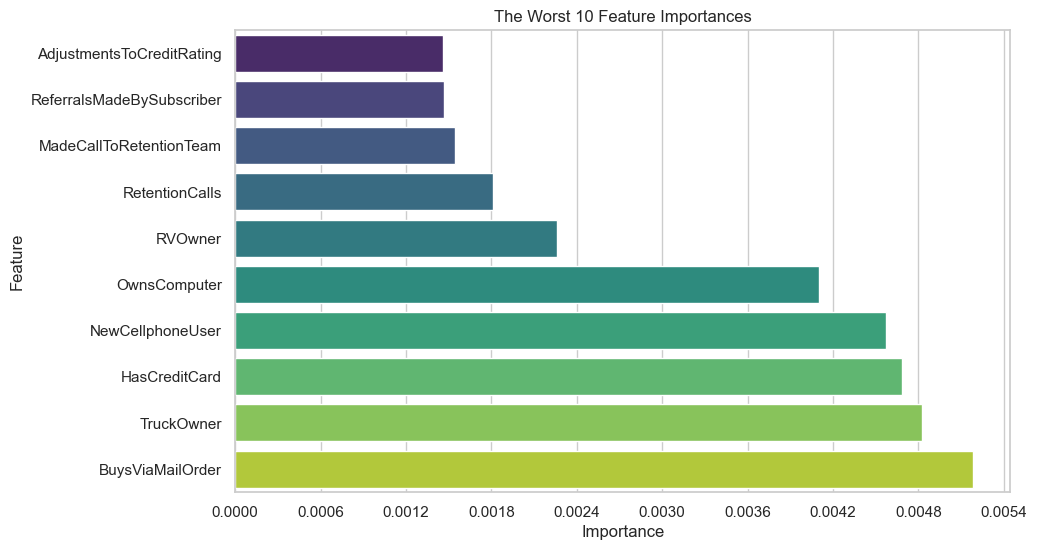

In [96]:
plot_feature_importance(RandomForest_model, x_train, selected_columns, top_n='last')

### Check Overfitting

Accuracy:
Training Accuracy: 0.9736
Validation Accuracy: 0.7528

Precision:
Training Precision: 0.9744
Validation Precision: 0.7729

Recall:
Training Recall: 0.9736
Validation Recall: 0.7528

F1-Score:
Training F1-Score: 0.9735
Validation F1-Score: 0.7383

MCC:
Training MCC: 0.9468
Validation MCC: 0.4995

Balanced Accuracy:
Training Balanced Accuracy: 0.9698
Validation Balanced Accuracy: 0.7211

Confusion Matrix:
Validation Confusion Matrix:
[[3061  232]
 [1181 1242]]

Cross-Validation(CV):
Cross-Validation Scores: [0.75738999 0.75671817 0.75243534 0.75409423 0.75199463]
Cross-Validation Mean Score: 0.7545


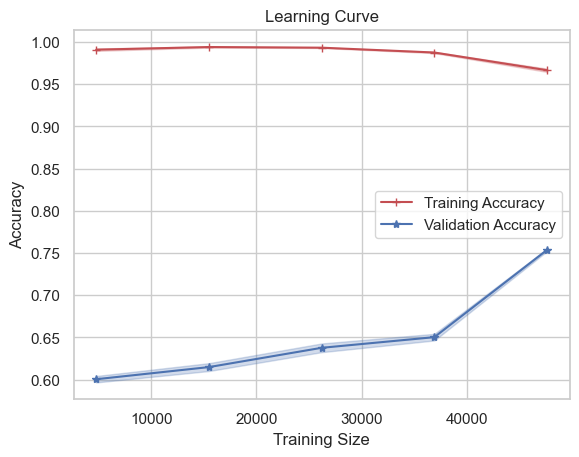

ROC AUC: 0.8032


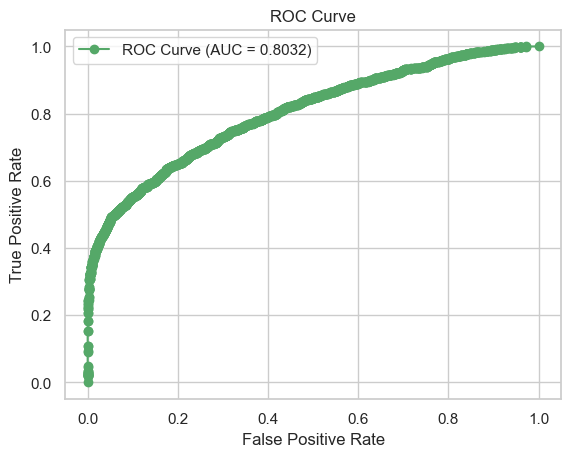

In [97]:
Check_Overfitting_Classification(RandomForest_model,x,y,x_train,y_train,x_valid,y_valid)

In [98]:
have_overfitting[1] = -1 # if have overfitting add -1 if have small overfitting between(1% and 4%) add 0 if no overfitting add 1

### Get y_predict

In [99]:
y_pred = RandomForest_model.predict(x_test)

### Evaluate model

#### Confusion Matrix

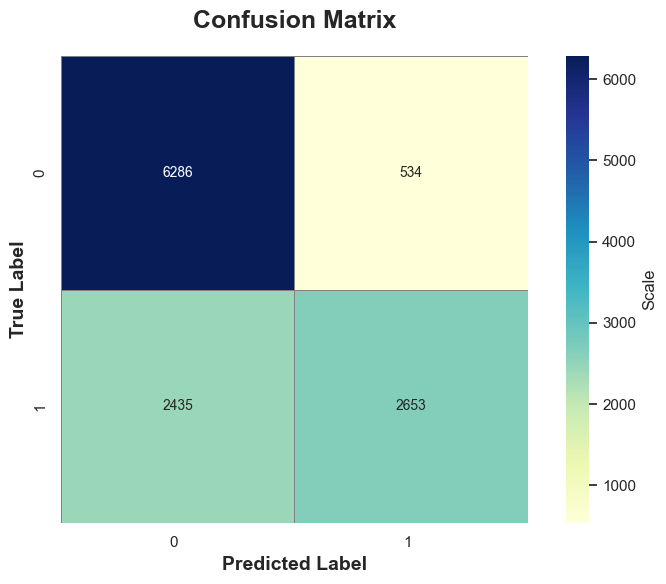

In [100]:
plot_confusion_matrix(y_test, y_pred)

#### accuracy,recall,precision,f1 and roc_auc

Accuracy score = 0.7507
Recall score = 0.5214
Precision score = 0.8324
F1 score = 0.6412
ROC AUC score = 0.7216

Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.92      0.81      6820
           1       0.83      0.52      0.64      5088

    accuracy                           0.75     11908
   macro avg       0.78      0.72      0.73     11908
weighted avg       0.77      0.75      0.74     11908




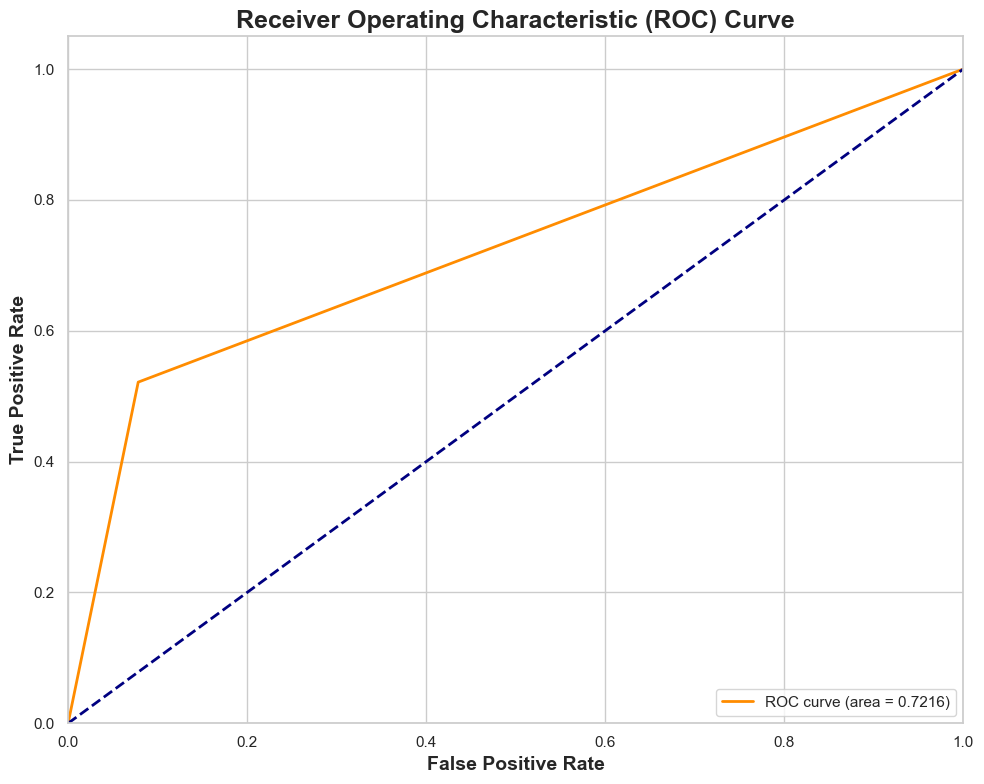

In [101]:
accuracy, recall, precision, f1, roc_auc = evaluate_model_Classification(y_test, y_pred)
models_values[1] = [accuracy, recall, precision, f1, roc_auc]

## DecisionTree_model

In [102]:
type_cross_valid = get_cross_validator(cv_type='StratifiedKFold', cv=5)

In [105]:
best_params, best_score, best_estimator = grid_search_classifier('DecisionTree', x_train, y_train, cv=type_cross_valid, scoring='accuracy', perfect_params=True)

print('best_params =',best_params)
print('best_params =',best_score)

best_params = {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
best_params = 0.6731639343613709


In [106]:
DT_model = best_estimator
DT_model

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='sqrt',
                       min_samples_split=5)

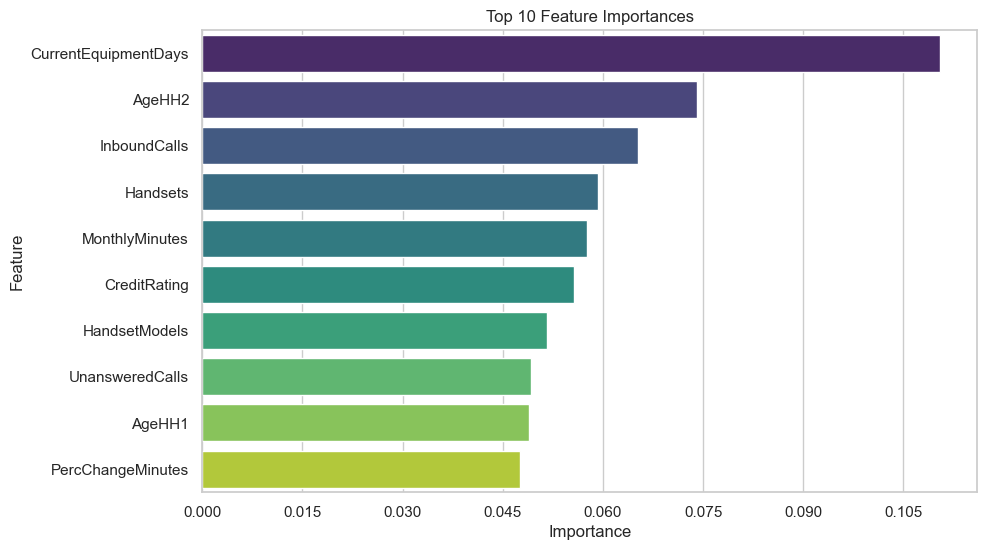

In [107]:
plot_feature_importance(DT_model, x_train, selected_columns, top_n='first')

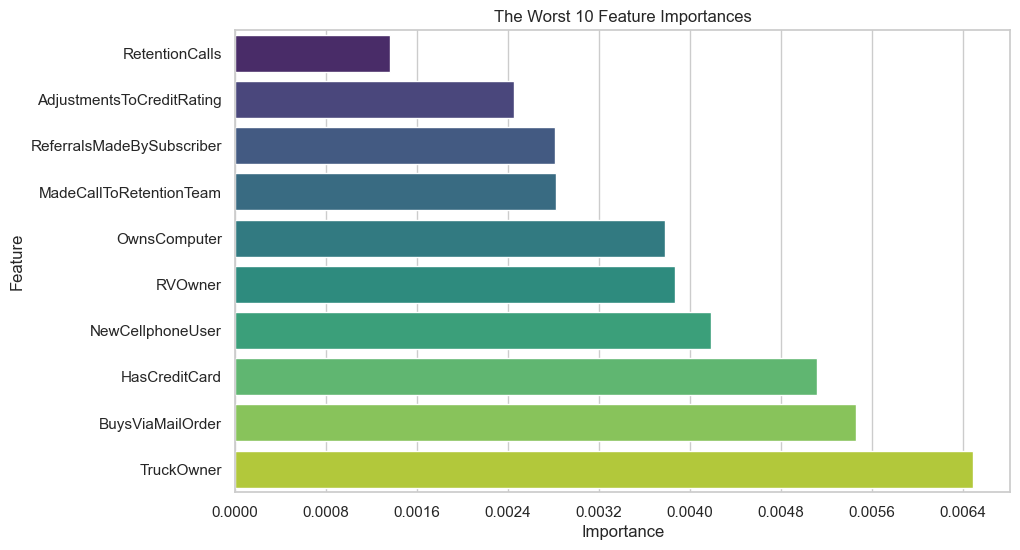

In [108]:
plot_feature_importance(DT_model, x_train, selected_columns, top_n='last')

### Check Overfitting

Accuracy:
Training Accuracy: 0.7443
Validation Accuracy: 0.6681

Precision:
Training Precision: 0.7548
Validation Precision: 0.6664

Recall:
Training Recall: 0.7443
Validation Recall: 0.6681

F1-Score:
Training F1-Score: 0.7333
Validation F1-Score: 0.6541

MCC:
Training MCC: 0.4766
Validation MCC: 0.3036

Balanced Accuracy:
Training Balanced Accuracy: 0.7182
Validation Balanced Accuracy: 0.6392

Confusion Matrix:
Validation Confusion Matrix:
[[2730  563]
 [1334 1089]]

Cross-Validation(CV):
Cross-Validation Scores: [0.66719852 0.68701713 0.67954316 0.66305535 0.67187369]
Cross-Validation Mean Score: 0.6737


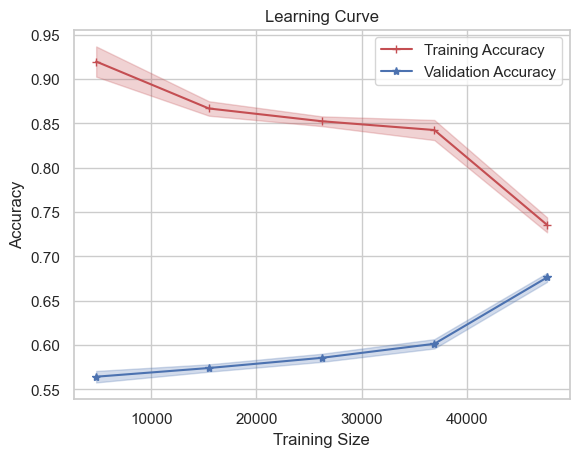

ROC AUC: 0.7086


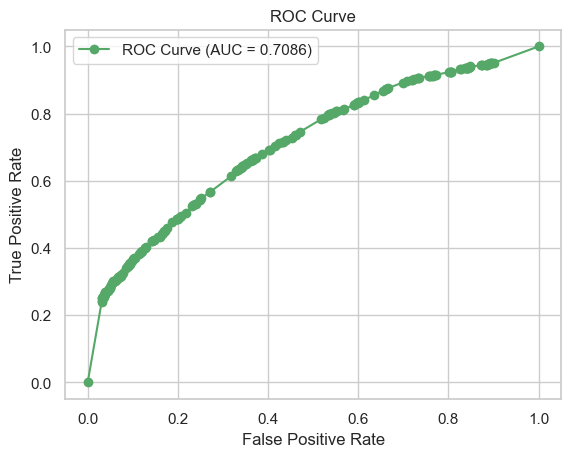

In [109]:
Check_Overfitting_Classification(DT_model,x,y,x_train,y_train,x_valid,y_valid)

In [110]:
have_overfitting[2] = -1 # if have overfitting add -1 if have small overfitting between(1% and 4%) add 0 if no overfitting add 1

### Get y_predict

In [111]:
y_pred = DT_model.predict(x_test)

### Evaluate model

#### Confusion Matrix

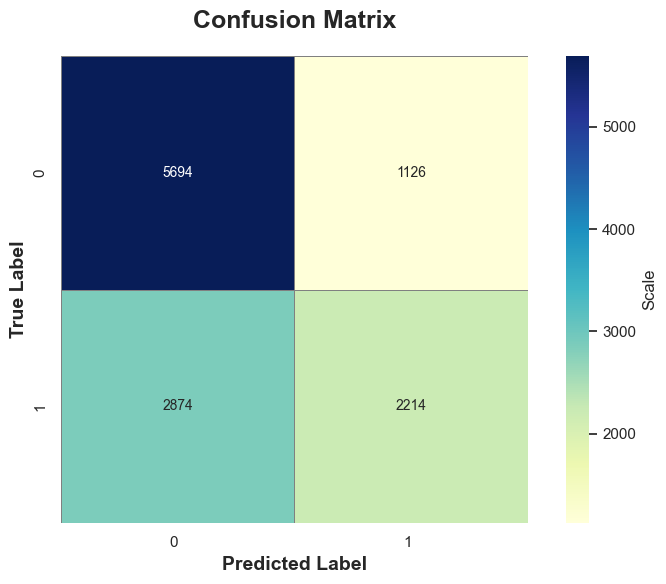

In [112]:
plot_confusion_matrix(y_test, y_pred)

#### accuracy,recall,precision,f1 and roc_auc

Accuracy score = 0.6641
Recall score = 0.4351
Precision score = 0.6629
F1 score = 0.5254
ROC AUC score = 0.6350

Classification Report:

              precision    recall  f1-score   support

           0       0.66      0.83      0.74      6820
           1       0.66      0.44      0.53      5088

    accuracy                           0.66     11908
   macro avg       0.66      0.64      0.63     11908
weighted avg       0.66      0.66      0.65     11908




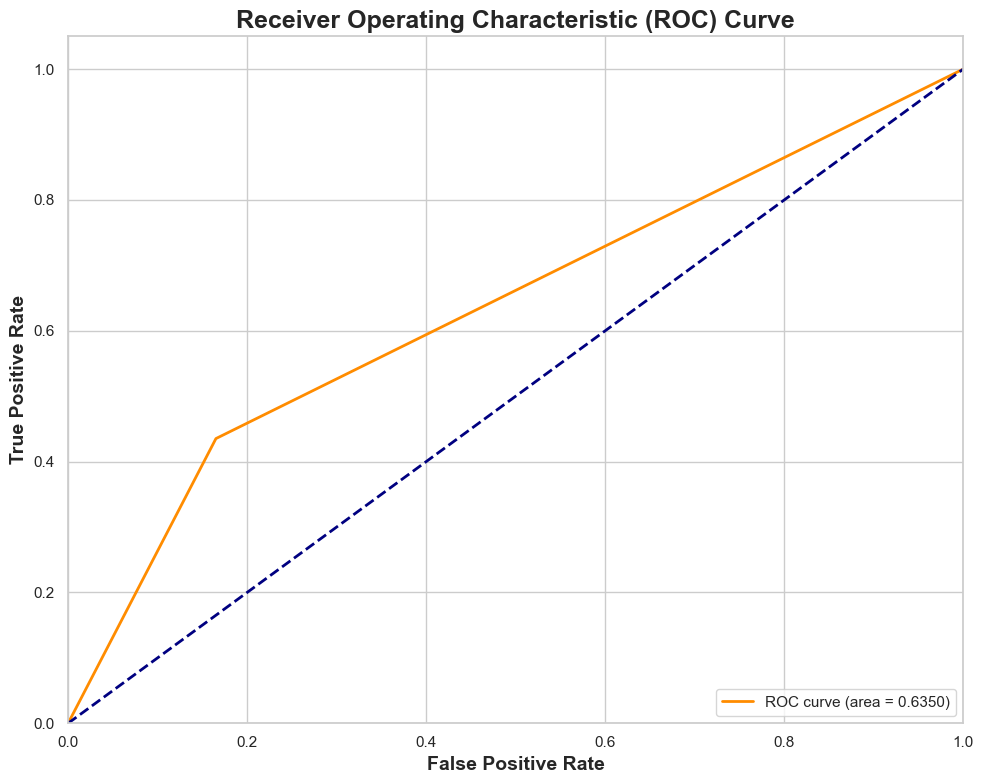

In [113]:
accuracy, recall, precision, f1, roc_auc = evaluate_model_Classification(y_test, y_pred)
models_values[2] = [accuracy, recall, precision, f1, roc_auc]

## Stacking_model

In [114]:
type_cross_valid = get_cross_validator(cv_type='StratifiedKFold', cv=5)

In [115]:
# Define individual classifiers

xgboost = XGBClassifier(gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=300)
xgboost_2 = XGBClassifier(gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=300)
xgboost_3 = XGBClassifier(gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=300)

random_forest = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=29,
                                    max_features='log2', min_samples_leaf=5,
                                    min_samples_split=5, n_estimators=196)
svc = DecisionTreeClassifier()

# Define final estimator
final_estimator = LogisticRegression()

In [116]:
# Define stacking classifier with individual estimators
stacking_model = StackingClassifier(
    estimators=[('xgb', xgboost), ('xgb_2', xgboost_2), ('xgb_3', xgboost_3)],
    final_estimator=LogisticRegression(),
    cv=type_cross_valid
)

# Fit the stacking model
stacking_model.fit(x_train, y_train)

StackingClassifier(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=0,
                                              grow_policy=None,
                                              im...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.2, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=3,
                                              max_leaves=None,
                                              min_child_weight=1, missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=300, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=LogisticRegression())

### Check Overfitting

Accuracy:
Training Accuracy: 0.7738
Validation Accuracy: 0.7430

Precision:
Training Precision: 0.7826
Validation Precision: 0.7485

Recall:
Training Recall: 0.7738
Validation Recall: 0.7430

F1-Score:
Training F1-Score: 0.7662
Validation F1-Score: 0.7339

MCC:
Training MCC: 0.5382
Validation MCC: 0.4689

Balanced Accuracy:
Training Balanced Accuracy: 0.7514
Validation Balanced Accuracy: 0.7182

Confusion Matrix:
Validation Confusion Matrix:
[[2902  391]
 [1078 1345]]

Cross-Validation(CV):
Cross-Validation Scores: [0.74991602 0.75495465 0.75100773 0.75493407 0.74863526]
Cross-Validation Mean Score: 0.7519


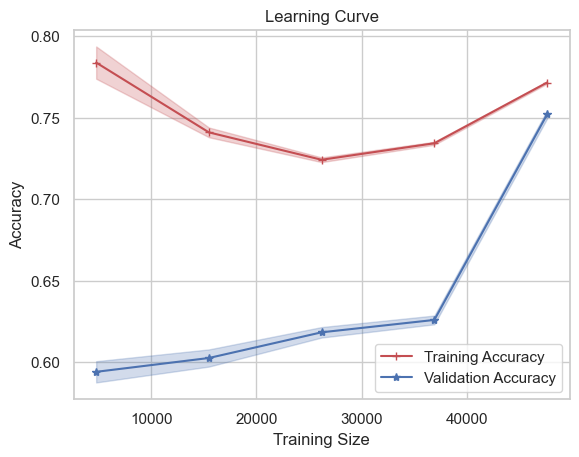

ROC AUC: 0.7979


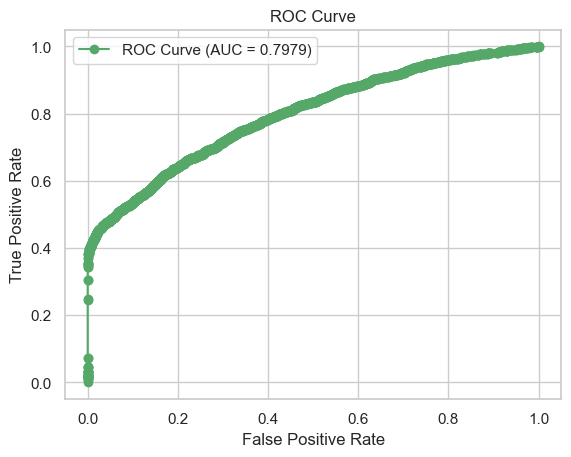

In [117]:
Check_Overfitting_Classification(stacking_model,x,y,x_train,y_train,x_valid,y_valid)

In [122]:
have_overfitting[3] = 0 # if have overfitting add -1 if have small overfitting between(1% and 4%) add 0 if no overfitting add 1

### Get y_predict

In [119]:
y_pred = stacking_model.predict(x_test)

### Evaluate model

#### Confusion Matrix

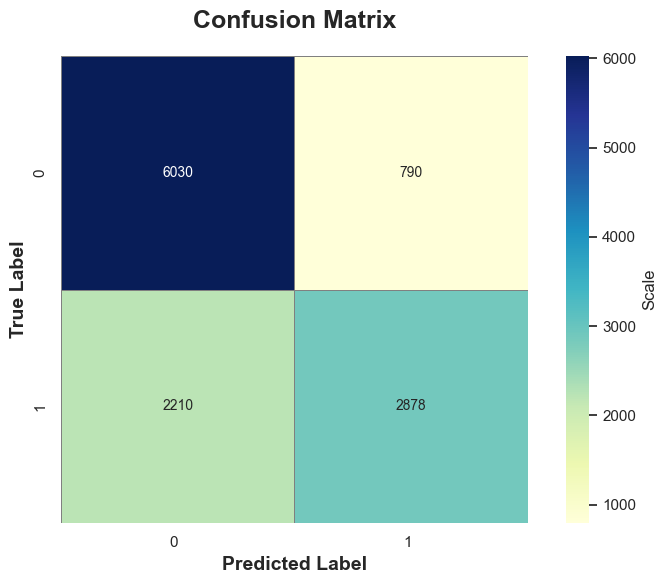

In [120]:
plot_confusion_matrix(y_test, y_pred)

#### accuracy,recall,precision,f1 and roc_auc

Accuracy score = 0.7481
Recall score = 0.5656
Precision score = 0.7846
F1 score = 0.6574
ROC AUC score = 0.7249

Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.88      0.80      6820
           1       0.78      0.57      0.66      5088

    accuracy                           0.75     11908
   macro avg       0.76      0.72      0.73     11908
weighted avg       0.75      0.75      0.74     11908




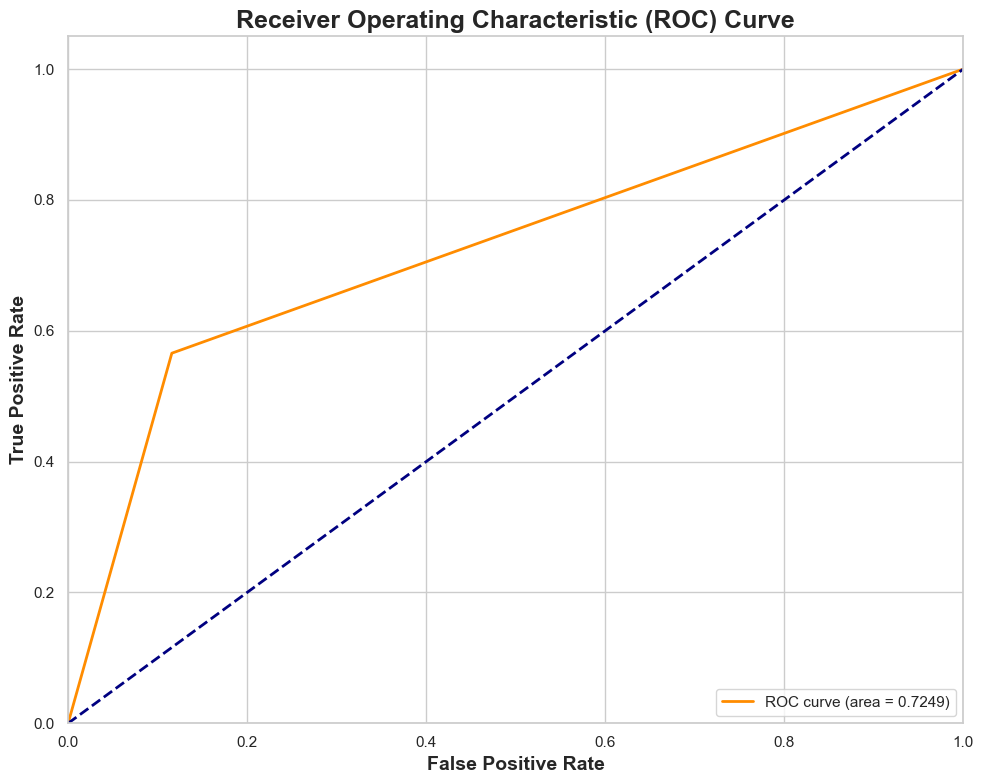

In [121]:
accuracy, recall, precision, f1, roc_auc = evaluate_model_Classification(y_test, y_pred)
models_values[3] = [accuracy, recall, precision, f1, roc_auc]

# compare between the models

In [123]:
evaluate_names = ['accuracy', 'recall', 'precision', 'f1', 'roc_auc']
models_names = ['XGBoost', 'RandomForest', 'DecisionTre', 'Stacking']


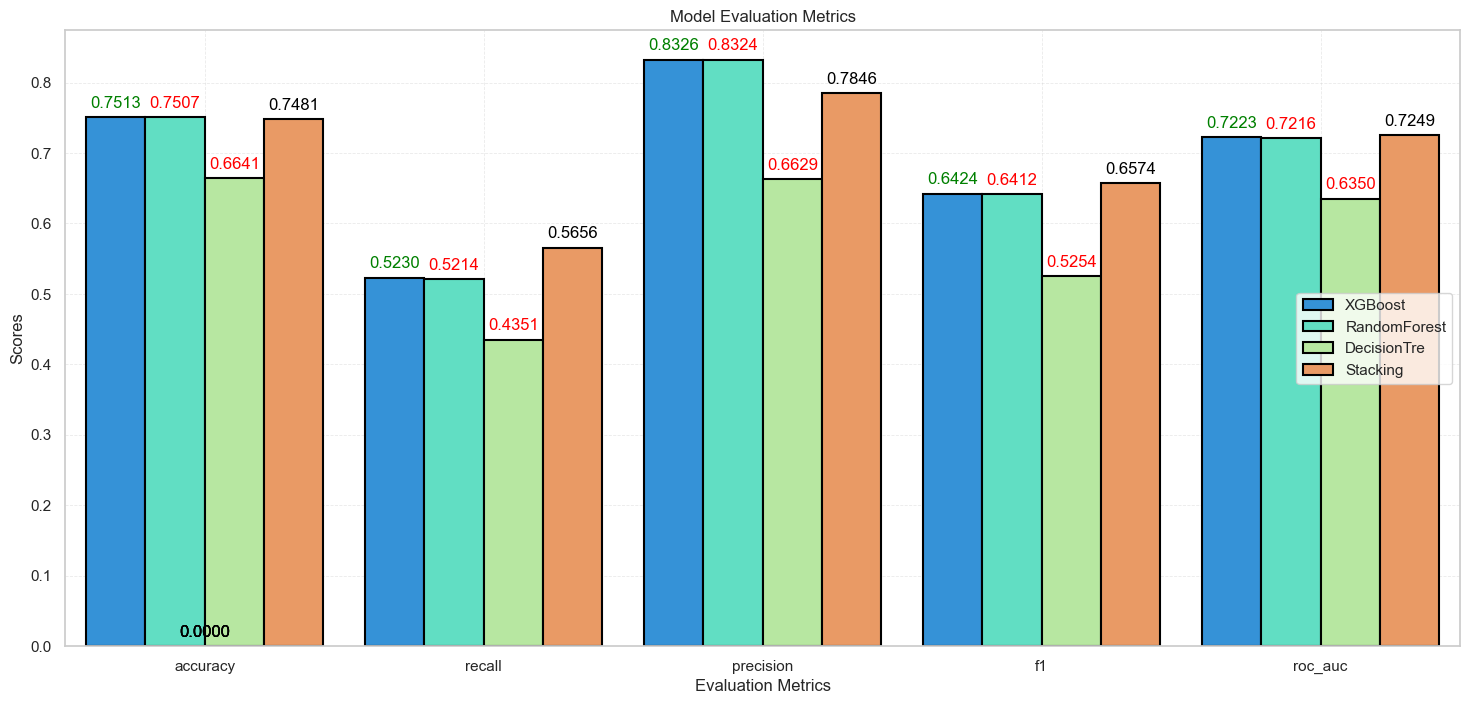

In [124]:
plots_evaluate_models(
    data=models_values, 
    labels=models_names, 
    categories=evaluate_names,
    have_overfitting=have_overfitting,
    palette='rainbow',
    title='Model Evaluation Metrics',
    xlabel='Evaluation Metrics',
    ylabel='Scores',
    figsize=(18, 8),
    width=0.85,
    hatch = False,
    annote_num = 4
)